In [1]:
import numpy as np
import pandas as pd
import time
import os
import sys
import matplotlib.pyplot as plt

## Utils

In [2]:
def read_file(filename: str):
    with open(filename) as file:
        books_in_library_with_id = []
        nb_books_in_library_with_id = []
        signup_days_for_library_with_id = []
        shipping_speed_for_library_with_id = []
        
        for idx, line in enumerate(file):
            if(idx == 0):
                # Start of the file
                line_1 = line.replace('\n', '').split(' ')
#                 print(line_1)
                nb_books = int(line_1[0])
                nb_libraries = int(line_1[1])
                nb_days = int(line_1[2])

#                 print(nb_books)
#                 print(nb_libraries)
#                 print(nb_days)
            elif(idx == 1):
                book_scores_with_id = line.replace('\n', '').split(' ')
                book_scores_with_id = list(map(int,book_scores_with_id))

            else:

                if(idx % 2 == 0):
                    
                    #### Per library section
                    line_1 = line.replace('\n', '').split(' ')
                    if(line_1[0] == ''):
                        break

                    nb_books_in_library_with_id.append(int(line_1[0]))
                    signup_days_for_library_with_id.append(int(line_1[1]))
                    shipping_speed_for_library_with_id.append(int(line_1[2]))
                    
#                     print(nb_books_in_library_with_id)
#                     print(signup_days_for_library_with_id)
#                     print(shipping_speed_for_library_with_id)
                if(idx % 2 == 1):

                    book_ids = line.replace('\n', '').split(' ')
                    if(book_ids[0] == ''):
                        break

                    book_ids = list(map(int,book_ids))
                    books_in_library_with_id.append(book_ids)
#                     print("book ids : {}".format(books_in_library_with_id))



    return nb_books, \
            nb_libraries, \
            nb_days, \
            nb_books_in_library_with_id, \
            signup_days_for_library_with_id, \
            shipping_speed_for_library_with_id, \
            book_scores_with_id ,\
            books_in_library_with_id

In [20]:
def output(lib_ids, book_ids, filename):
    with open(filename, "w") as file:
        line = str(len(lib_ids)) + "\n"
        file.write(line)
        for lib_id, ids in zip(lib_ids, book_ids):
            line1 = str(lib_id) + " " + str(len(ids)) + "\n"
            file.write(line1)
            line2 = ""
            for id in ids:
                line2 += str(id) + " "
            line2 = line2[:-1] + "\n"
            file.write(line2)

## Naive algorithm

Sort libraries by signup_days_for_library_with_id and return them with a book ordering maximizing the score

In [4]:
def sort_books_per_library(library_list_in_order : list):


    # Books IDs to send first of ALL books
    book_scores_index_sorted = list(reversed(sorted(range(len(book_scores_with_id)), key=book_scores_with_id.__getitem__)))

    book_shipping_sorted_for_library_with_id = []
    for library_id in library_list_in_order:
        books = books_in_library_with_id[library_id]

        shipping_order = []
        for book_id in book_scores_index_sorted:
            if(book_id in books):
                shipping_order.append(book_id)

        book_shipping_sorted_for_library_with_id.append(shipping_order)

    return book_shipping_sorted_for_library_with_id

In [5]:
file_names = ["data/a_example.txt", "data/b_read_on.txt", 
              "data/c_incunabula.txt", "data/d_tough_choices.txt", 
              "data/e_so_many_books.txt", "data/f_libraries_of_the_world.txt"]

In [7]:
file_name = file_names[2]

In [8]:
nb_books , \
	nb_libraries, \
	nb_days, \
	nb_books_in_library_with_id, \
	signup_days_for_library_with_id, \
	shipping_speed_for_library_with_id, \
	book_scores_with_id ,\
	books_in_library_with_id  = read_file(file_name)

In [9]:
tmp = np.sort(signup_days_for_library_with_id)
indices = np.argsort(signup_days_for_library_with_id)

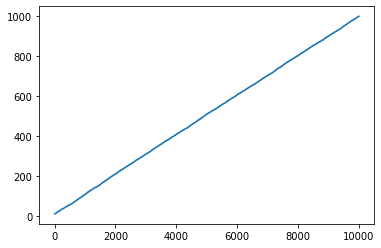

In [10]:
plt.plot(tmp)

In [11]:
cumsum = np.cumsum(tmp).tolist()

In [12]:
nb_days

100000

In [13]:
lib_to_use = []
count = 0

while True:
    
    if(len(cumsum) <= count):
        break
    if(cumsum[count]>nb_days):
        break
        
    lib_to_use.append(indices[count])
    count +=1
    

In [14]:
len(lib_to_use)

1338

In [21]:
out = sort_books_per_library(lib_to_use)

In [22]:
out

[[32352,
  98491,
  19238,
  67018,
  61759,
  74118,
  54343,
  20451,
  72402,
  48161,
  5511,
  6718,
  42504,
  70960,
  26037,
  34902,
  44219],
 [24096,
  18968,
  82966,
  71256,
  98832,
  52845,
  2883,
  63589,
  5658,
  7767,
  96757,
  99572,
  99686,
  77607,
  75188,
  21318,
  29512,
  46254,
  41367,
  1416],
 [45682,
  52743,
  10161,
  77264,
  41179,
  10639,
  18994,
  71956,
  39849,
  1331,
  12919,
  34725,
  70656,
  95372,
  90925,
  20394,
  63725],
 [5704,
  78057,
  66720,
  51407,
  54495,
  88667,
  95826,
  11603,
  32155,
  95955,
  64015,
  64680,
  38261,
  15550,
  80813,
  28280,
  19290,
  8169],
 [16863, 79950, 87508, 71560, 59349, 39297, 11281, 46288, 42728, 88199],
 [37941,
  9691,
  19051,
  51664,
  92431,
  71928,
  26982,
  33664,
  24661,
  95102,
  66365,
  29112,
  15961,
  28939,
  58350,
  46654,
  27498],
 [97546,
  91198,
  10089,
  2444,
  91892,
  66385,
  50738,
  80916,
  62968,
  5377,
  72011,
  85856,
  7209,
  89861,
  69788,

In [23]:
output(lib_to_use, out, "subm_f.txt")

In [26]:
sub_names = ['a.txt', 'b.txt', 'c.txt', 'd.txt', 'e.txt', 'f.txt']
_id_ = 0
for file_name in file_names:
    print(file_name)
    nb_books , \
	nb_libraries, \
	nb_days, \
	nb_books_in_library_with_id, \
	signup_days_for_library_with_id, \
	shipping_speed_for_library_with_id, \
	book_scores_with_id ,\
	books_in_library_with_id  = read_file(file_name)
    
    tmp = np.sort(signup_days_for_library_with_id)
    indices = np.argsort(signup_days_for_library_with_id)
    
    cumsum = np.cumsum(tmp).tolist()
    
    lib_to_use = []
    count = 0

    while True:

        if(len(cumsum) <= count):
            break
        if(cumsum[count]>nb_days):
            break

        lib_to_use.append(indices[count])
        count +=1
        
    out = sort_books_per_library(lib_to_use)
    output(lib_to_use, out, sub_names[_id_])
    _id_+=1
    

data/a_example.txt
data/b_read_on.txt
data/c_incunabula.txt
data/d_tough_choices.txt
data/e_so_many_books.txt
data/f_libraries_of_the_world.txt
